# CoviDetector - Covid Detection from Chest X-Ray Image
Dataset: https://www.kaggle.com/fusicfenta/chest-xray-for-covid19-detection

## 1. Import Dependencies

In [34]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import models, layers
import keras
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten
from keras.models import Sequential
from keras.preprocessing import image

## 2. Loading training dataset into tensorflow dataset object

In [16]:
train_data = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Building Innovative Systems/Project 3/Dataset/Train",
    seed=786,
    shuffle=True,
    image_size=(256,256),
    batch_size=16
)

Found 288 files belonging to 2 classes.


In [17]:
class_names = train_data.class_names
class_names

['Covid', 'Normal']

In [18]:
for image_batch, labels_batch in train_data.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

#Each batch contains 32 images of size 256x256x3

(16, 256, 256, 3)
[0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0]


## 3. Visualization

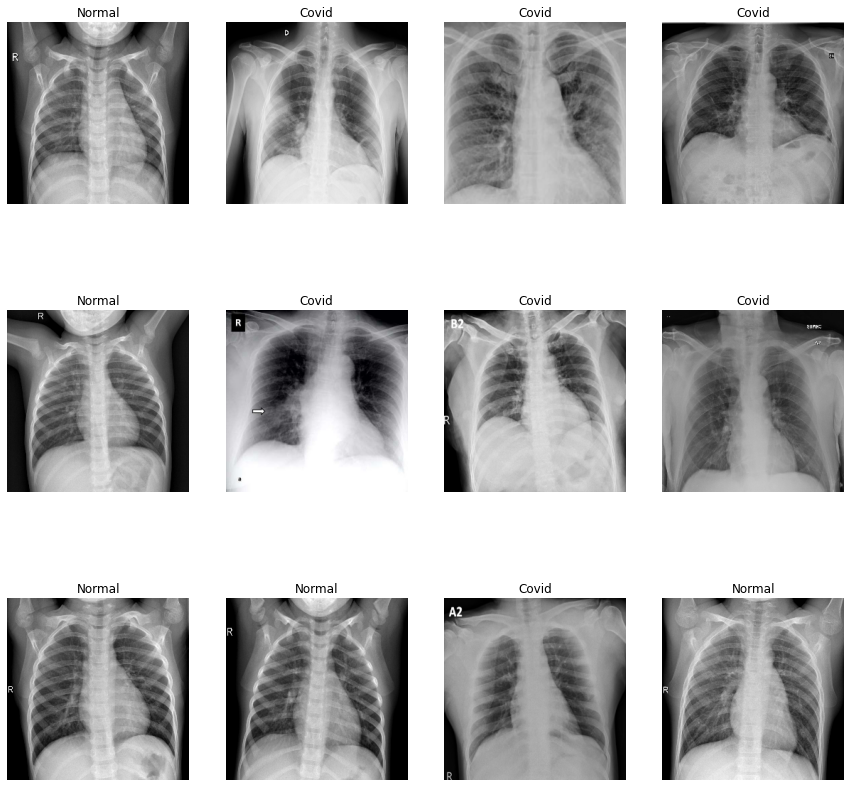

In [6]:
plt.figure(figsize=(15, 15))
for image_batch, labels_batch in train_data.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

## 4. Loading validation dataset into tensorflow dataset object

In [19]:
val_data = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/Building Innovative Systems/Project 3/Dataset/Val",
    seed=786,
    shuffle=True,
    image_size=(256,256),
    batch_size=16
)

Found 60 files belonging to 2 classes.


## 5. Cache, Shuffle and Prefetch the Dataset

In [20]:
train_data = train_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_data = val_data.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

## 6. Building the Model

In [21]:
#Layer for Resizing and Normalization

resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(256,256),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [22]:
#Data Augmentation: Flipping and Rotation

data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [23]:
#Applying data augmentation on training dataset

train_data = train_data.map(lambda x, y: (data_augmentation(x, training=True), y)).prefetch(buffer_size=tf.data.AUTOTUNE)

In [83]:
#Building the model

input_shape = (32,256,256,3)

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Conv2D(128, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.25),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.50),
    layers.Dense(2, activation='softmax'),
])

model.build(input_shape=input_shape)

In [84]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d_16 (Conv2D)          (32, 254, 254, 32)        896       
                                                                 
 conv2d_17 (Conv2D)          (32, 252, 252, 64)        18496     
                                                                 
 max_pooling2d_12 (MaxPoolin  (32, 126, 126, 64)       0         
 g2D)                                                            
                                                                 
 dropout_16 (Dropout)        (32, 126, 126, 64)        0         
                                                                 
 conv2d_18 (Conv2D)          (32, 124, 124, 64)        36928     
                                                      

In [86]:
#Model compilation

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [87]:
history = model.fit(
    train_data,
    batch_size=16,
    validation_data=val_data,
    verbose=1,
    epochs=40,
)

Epoch 1/40
18/18 [==============================] - 5s 246ms/step - loss: 1.1514 - accuracy: 0.5035 - val_loss: 0.6884 - val_accuracy: 0.5000
Epoch 2/40
18/18 [==============================] - 4s 215ms/step - loss: 0.6915 - accuracy: 0.5451 - val_loss: 0.6856 - val_accuracy: 0.9000
Epoch 3/40
18/18 [==============================] - 4s 214ms/step - loss: 0.6628 - accuracy: 0.5729 - val_loss: 0.6358 - val_accuracy: 0.9000
Epoch 4/40
18/18 [==============================] - 4s 242ms/step - loss: 0.6229 - accuracy: 0.6597 - val_loss: 0.6058 - val_accuracy: 0.8667
Epoch 5/40
18/18 [==============================] - 4s 230ms/step - loss: 0.5507 - accuracy: 0.7465 - val_loss: 0.4741 - val_accuracy: 0.8000
Epoch 6/40
18/18 [==============================] - 4s 222ms/step - loss: 0.5412 - accuracy: 0.7778 - val_loss: 0.4117 - val_accuracy: 0.8667
Epoch 7/40
18/18 [==============================] - 4s 213ms/step - loss: 0.4450 - accuracy: 0.8125 - val_loss: 0.4621 - val_accuracy: 0.7833
Epoch 

In [88]:
model.save('/content/drive/MyDrive/Building Innovative Systems/Project 3/trained_model_new.h5')

## 7. Plotting Graphs

In [89]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

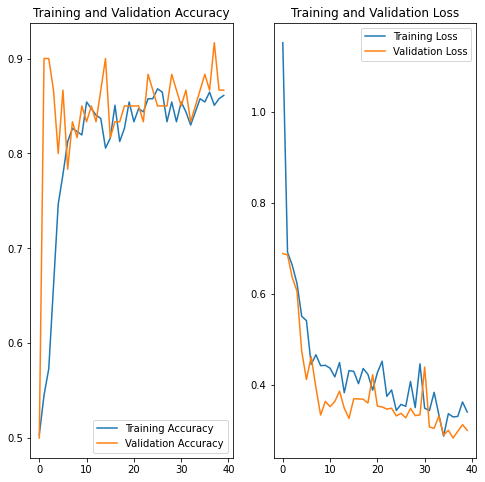

In [90]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(40), acc, label='Training Accuracy')
plt.plot(range(40), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(40), loss, label='Training Loss')
plt.plot(range(40), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## 8. Prediction

In [91]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [93]:
image=cv2.imread("/content/drive/MyDrive/Building Innovative Systems/Project 3/Dataset/Prediction/NORMAL2-IM-0373-0001.jpeg")
image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image=cv2.resize(image, (256,256))

predict(model, image)

('Normal', 82.69)